# CDC15 yeast gene expression analysis 

Problem:

We have a big dataset of gene expressions of a yeast known as CDC15. In total, we have 26 different times and about 4380 different genes. Which means that we got about 100740 different pieces of information. Given all these stuff, can we find a good clustering for these genes? Besides, can we generalize smaller clusterings to bigger ones? That is, can we consider only 2 or 3 different times in order to find a good clustering?

To do that, i'm going to use Lloyd's algorithm/K-Means with different numbers of K, plot that, compare the results from different dimensional clusterings and analyze the results.

Source: http://www.exploredata.net/Downloads/Gene-Expression-Data-Set

Pedro Henrique de Almeida
<br>
RA: 148526

In [1]:
# Data handling
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#Lloyd's algorithm
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(".\Spellman.csv", sep=',')
display(df)

,time,40,50,60,70,80,90,100,110,120,...,170,180,190,200,210,220,230,240,250,260
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,0.59,0.34,-0.28,-0.09,-0.44,0.31,0.03,0.57,0.00,0.010
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,-0.30,-0.38,0.07,-0.04,0.13,-0.06,-0.26,-0.10,0.27,0.235
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,0.12,-0.17,0.11,-0.15,0.03,-0.26,-0.34,-0.34,0.25,0.190
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,0.07,0.61,-0.20,0.49,-0.43,0.80,-0.47,1.01,-0.36,-0.405
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,-0.48,-0.40,-0.59,0.54,-0.09,1.03,0.08,0.57,-0.26,-0.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,YPR198W,-0.060,0.08,0.210,0.34,0.65,-0.26,0.14,-0.33,0.53,...,0.14,-0.64,-0.26,0.53,-0.17,0.59,-0.96,0.40,-0.23,-0.325
4377,YPR199C,0.155,0.19,0.235,0.28,-0.26,0.21,-0.40,0.34,-0.80,...,0.34,0.15,0.30,-0.06,0.13,-0.44,-1.03,0.14,0.30,0.250
4378,YPR201W,-0.255,-0.36,-0.300,-0.24,1.30,-0.07,0.29,-0.20,0.25,...,-0.81,0.89,0.07,1.04,-0.32,0.80,-0.13,0.84,-0.39,-0.415
4379,YPR203W,0.570,0.12,-0.070,-0.26,-0.44,-0.21,-1.08,0.39,-0.17,...,0.12,-0.96,-0.31,-0.81,-0.34,-1.21,-1.36,-0.12,0.69,0.555


#### Here we're simplifying the data to a two-dimensional problem.
#### We plot the data without any clustering, apply K-Means with different K's and see the results

In [3]:
sample_1 = df[['40', '50']]
points = sample_1.to_numpy()

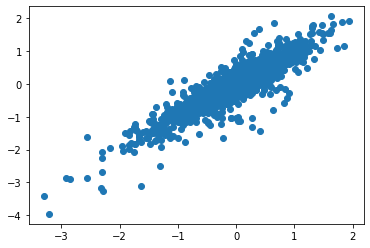

In [4]:
plt.scatter(points[:,0], points[:,1])

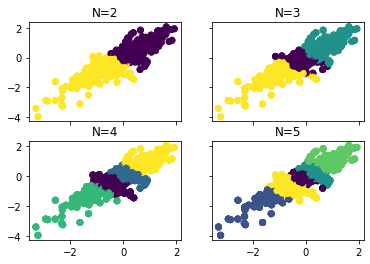

In [5]:
%matplotlib inline
fig, axs = plt.subplots(2, 2)

n=2

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_2_2d = kmeans.fit_predict(points)

axs[0, 0].set_title(f"N={n}")
for i in range(n):
    axs[0, 0].scatter(points[:,0], points[:,1], c=y_km_2_2d)

#

n = 3

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_3_2d = kmeans.fit_predict(points)

axs[0, 1].set_title(f"N={n}")
for i in range(n):
    axs[0, 1].scatter(points[:,0], points[:,1], c=y_km_3_2d)
    
#

n=4

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_4_2d = kmeans.fit_predict(points)

axs[1, 0].set_title(f"N={n}")
for i in range(n):
    axs[1, 0].scatter(points[:,0], points[:,1], c=y_km_4_2d)
    
#

n=5

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_5_2d = kmeans.fit_predict(points)

axs[1, 1].set_title(f"N={n}")
for i in range(n):
    axs[1, 1].scatter(points[:,0], points[:,1], c=y_km_5_2d)
    
for ax in axs.flat:
    ax.label_outer()

plt.show()

#### Now we're simplifying the data to a three-dimensional problem.
#### We plot the data without any clustering, apply K-Means with different K's and see the results

In [6]:
# Execute caso queira interagir com os plots em 3D.
%matplotlib notebook

In [7]:
%matplotlib inline

In [8]:
sample_2 = df[['40', '50', '60']]
points = sample_2.to_numpy()

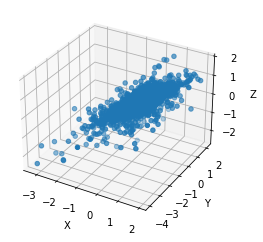

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = points[:,0], points[:,1], points[:,2]
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(X, Y, Z)

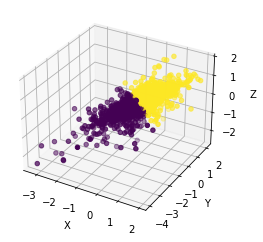

In [10]:
n=2

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_2_3d = kmeans.fit_predict(points)

fig = plt.figure()
bx = fig.add_subplot(111, projection='3d')
bx.set_xlabel("X")
bx.set_ylabel("Y")
bx.set_zlabel("Z")
bx.scatter(X,Y,Z, c=y_km_2_3d)


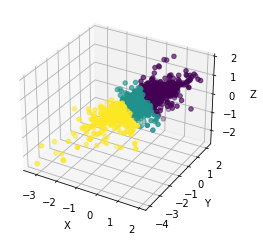

In [11]:
n=3

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_3_3d = kmeans.fit_predict(points)

fig = plt.figure()
cx = fig.add_subplot(111, projection='3d')
cx.set_xlabel("X")
cx.set_ylabel("Y")
cx.set_zlabel("Z")
cx.scatter(X,Y,Z, c=y_km_3_3d)


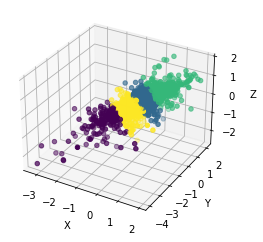

In [12]:
n=4

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_4_3d = kmeans.fit_predict(points)

fig = plt.figure()
dx = fig.add_subplot(111, projection='3d')
dx.set_xlabel("X")
dx.set_ylabel("Y")
dx.set_zlabel("Z")
dx.scatter(X,Y,Z, c=y_km_4_3d)

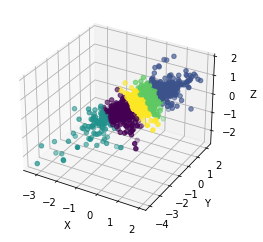

In [13]:
n=5

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_5_3d = kmeans.fit_predict(points)

fig = plt.figure()
ex = fig.add_subplot(111, projection='3d')
ex.set_xlabel("X")
ex.set_ylabel("Y")
ex.set_zlabel("Z")
ex.scatter(X,Y,Z, c=y_km_5_3d)

#### Notice that, as the way K increases in a 2D problem compared to a 3D problem looks pretty similar. But we can't assert anything certainly so far. 
#### But we can compare how many different assignments for each problem we have:

In [14]:
k_2, k_3, k_4, k_5 = 0, 0, 0, 0
for i in range(len(points)):
    if y_km_2_2d[i] == y_km_2_3d[i]:
        k_2 += 1
    if y_km_3_2d[i] == y_km_3_3d[i]:
        k_3 += 1
    if y_km_4_2d[i] == y_km_4_3d[i]:
        k_4 += 1
    if y_km_5_2d[i] == y_km_5_3d[i]:
        k_5 += 1

In [15]:
print(f"Difference with K = 2: {k_2}\nDifference with K = 3: {k_3}\nDifference with K = 4: {k_4}\nDifference with K = 5: {k_5}")

Difference with K = 2: 178
Difference with K = 3: 634
Difference with K = 4: 2046
Difference with K = 5: 141


In [16]:
cols = ['40', '50']
entryPoint = 50
y_km_gen = []
sample = df[cols]
points = sample.to_numpy()

different_dimensions_matrix = []

for i in range(1, 9):
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(points)
        clusters = kmeans.cluster_centers_
        y_km_gen.append(kmeans.fit_predict(points))
        
    different_dimensions_matrix.append(y_km_gen)
    y_km_gen = []
    entryPoint += 10
    cols.append(str(entryPoint))
    sample = df[cols]
    points = sample.to_numpy()

In [17]:
diff_matrix = []
for i in range(1-1, 9-2):
    line = []
    for j in range(i+1, 9-1):
        arrCompare = []
        for k in range(2-2, 11-2):
            diff = 0
            for l in range(len(points)):
                if different_dimensions_matrix[i][k][l] == different_dimensions_matrix[j][k][l]:
                    diff += 1
            arrCompare.append(diff)
        line.append(arrCompare)
    diff_matrix.append(line)
            

# Explicando os dados:
Basicamente o que fizemos acima foi uma generalização para diferentes valores da dimensão e de K. Para dispor os dados fiz a seguinte abstraçào:

Para calcular as diferenças entre dimensões diferentes teremos uma matriz 3D, de tamanho 3,3,9.
<br>
<br>
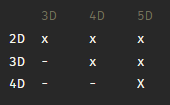
<br>
Onde cada um dos x é uma lista carregando as diferenças a medida em que K varia, por exemplo:
<br>
<br>
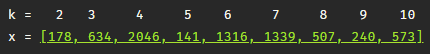
<br><br>
OBS:
Se você prestar atenção os dados na verdades estão dispostos assim, isso devido o uso do método .append():
<br>
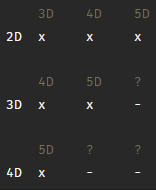

#### Perceba que temos os mesmos valores calculados anteriormente nos 4 primeiros indíces do vetor.

In [18]:
diff_matrix[0][0]

[178, 634, 2046, 141, 1316, 1339, 507, 240, 573]

#### Vamos ver o resto dos resultados:

In [19]:
for i in range(len(diff_matrix)):
    for j in range(len(diff_matrix[i])):
        print(f"Diff between {i+2}D and {j+i+3}D")
        print(diff_matrix[i][j])
    print("")

Diff between 2D and 3D
[178, 634, 2046, 141, 1316, 1339, 507, 240, 573]
Diff between 2D and 4D
[376, 3790, 441, 751, 1052, 443, 1443, 941, 83]
Diff between 2D and 5D
[362, 1627, 718, 1732, 1033, 349, 522, 581, 229]
Diff between 2D and 6D
[517, 3618, 874, 880, 1036, 680, 504, 417, 274]
Diff between 2D and 7D
[3821, 1638, 1791, 223, 416, 608, 1052, 329, 626]
Diff between 2D and 8D
[3788, 3506, 1300, 1983, 583, 343, 66, 284, 698]
Diff between 2D and 9D
[3573, 1477, 964, 1016, 1223, 698, 221, 708, 399]

Diff between 3D and 4D
[4177, 712, 821, 544, 654, 39, 1011, 38, 482]
Diff between 3D and 5D
[4171, 305, 1182, 1004, 402, 1067, 791, 242, 1060]
Diff between 3D and 6D
[4012, 848, 1360, 420, 553, 575, 76, 463, 762]
Diff between 3D and 7D
[448, 471, 1271, 1693, 8, 434, 563, 258, 601]
Diff between 3D and 8D
[475, 1033, 825, 658, 75, 332, 159, 510, 415]
Diff between 3D and 9D
[754, 565, 401, 376, 628, 630, 446, 357, 97]

Diff between 4D and 5D
[4295, 1512, 1768, 145, 802, 875, 666, 5, 385]
Diff 

# Clustering for a 26D problem with k=5


In [20]:
aux = df.drop('time', inplace=True, axis=1)

In [21]:
points = df.to_numpy()
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_5_26d = kmeans.fit_predict(points)

In [22]:
for i in range(0, 8):
    print(f"26D compared to {i+2}D = {np.sum(y_km_5_26d == different_dimensions_matrix[i][5-2])}" )

26D compared to 2D = 1566
26D compared to 3D = 914
26D compared to 4D = 1295
26D compared to 5D = 745
26D compared to 6D = 687
26D compared to 7D = 141
26D compared to 8D = 914
26D compared to 9D = 316


# Clustering for a 26D problem with k=7

In [23]:
points = df.to_numpy()
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_5_26d = kmeans.fit_predict(points)

In [24]:
for i in range(0, 8):
    print(f"26D compared to {i+2}D = {np.sum(y_km_5_26d == different_dimensions_matrix[i][7-2])}" )

26D compared to 2D = 701
26D compared to 3D = 954
26D compared to 4D = 791
26D compared to 5D = 587
26D compared to 6D = 461
26D compared to 7D = 749
26D compared to 8D = 844
26D compared to 9D = 756


# Clustering for a 26D problem with k=10

In [25]:
points = df.to_numpy()
kmeans = KMeans(n_clusters=10, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_5_26d = kmeans.fit_predict(points)

In [26]:
for i in range(0, 8):
    print(f"26D compared to {i+2}D = {np.sum(y_km_5_26d == different_dimensions_matrix[i][10-2])}" )

26D compared to 2D = 43
26D compared to 3D = 386
26D compared to 4D = 433
26D compared to 5D = 578
26D compared to 6D = 338
26D compared to 7D = 545
26D compared to 8D = 355
26D compared to 9D = 412


In [27]:
#You can manipulate this cell as your will to see the data.

myDf = pd.DataFrame({"time": aux, "26D": y_km_5_26d, "9D": different_dimensions_matrix[7][3], "2D": different_dimensions_matrix[0][3]})

# Conclusion

In fact, the differences between lower dimensional compared to higher dimensional problems may variate without any clearly ratio, so we can't generalize low dimensional clustering to high dimensionals.
But we can see that as the way that K increases, the difference between the differences tends to decrease. 

